In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read data 

data_directory = "data/"

df = pd.read_csv(data_directory + 'train.csv').set_index('PassengerId')
df.head(25)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [3]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# initial type transformations

df = df.replace({"Sex": {"female": 0, "male": 1}})

In [6]:
# data aggregation

df["has_cabin"] = pd.notnull(df["Cabin"])

In [56]:
# unique values for cabin feature
print("Unique cabin values:")
print(df["Cabin"].unique())

print()
print("Unique cabin values for category:")
df['category_cabin'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else x)
print(df["category_cabin"].unique())

# number of cabins per person
df['num_cabins'] = df['Cabin'].apply(lambda x: len(x.split(' ')) if pd.notnull(x) else 0)

Unique cabin values:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Unique cabin values f

In [64]:
# unique values for age feature
print("Unique age values:")
print(df["Age"].unique())

# age in bins
print()
print("Age in bins:")
df['age_bins'] = pd.cut(x=df['Age'], bins=[0, 1, 4, 11, 17, 24, 49, 69, 999], labels=['Baby', 'Toddler', 'Child', 'Teenager','Young adult', 'Adult', 'Pre-Eldery', 'Eldery'])
print(df["age_bins"].unique())

Unique age values:
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

Age in bins:
['Young adult', 'Adult', NaN, 'Pre-Eldery', 'Toddler', 'Teenager', 'Child', 'Baby', 'Eldery']
Categories (8, object): ['Baby' < 'Toddler' < 'Child' < 'Teenager' < 'Young adult' < 'Adult' < 'Pre-Eldery' < 'Eldery']


In [51]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=42)

In [52]:
X_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin,num_cabins,category_cabin,age_bins
PassengerId,,,,,,,,,,,,,,,
446,1,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,True,1,A,Toddler
651,0,3,"Mitkoff, Mr. Mito",1,NaN,0,0,349221,7.8958,NaN,S,False,0,NaN,NaN
173,1,3,"Johnson, Miss. Eleanor Ileen",0,1.0,1,1,347742,11.1333,NaN,S,False,0,NaN,Baby
451,0,2,"West, Mr. Edwy Arthur",1,36.0,1,2,C.A. 34651,27.7500,NaN,S,False,0,NaN,Adult
315,0,2,"Hart, Mr. Benjamin",1,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,False,0,NaN,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,3,"Salkjelsvik, Miss. Anna Kristine",0,21.0,0,0,343120,7.6500,NaN,S,False,0,NaN,Young adult
271,0,1,"Cairns, Mr. Alexander",1,NaN,0,0,113798,31.0000,NaN,S,False,0,NaN,NaN
861,0,3,"Hansen, Mr. Claus Peter",1,41.0,2,0,350026,14.1083,NaN,S,False,0,NaN,Adult


<AxesSubplot:>

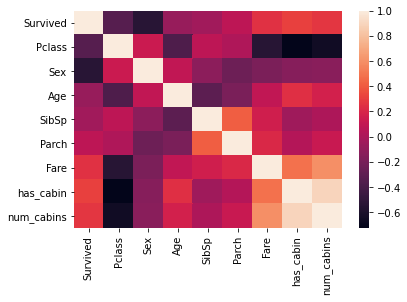

In [66]:
sns.heatmap(df.corr())

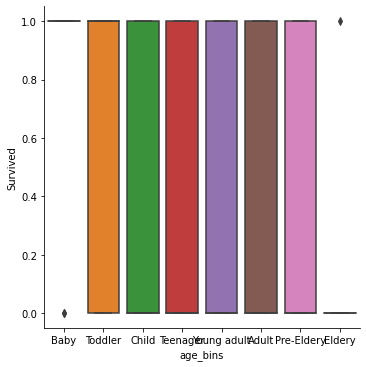

In [69]:
sns.catplot(x="age_bins", y="Survived", kind="box", data=df)